In [2]:
import os

print('Current Dir: ', os.getcwd())
print('Dir Contains:', os.listdir())

Current Dir:  /home/keval/kaggle data/Facial-keypoints-det
Dir Contains: ['IdLookupTable.csv', 'Facial_key_points_v1.pt', 'Face_points.csv', '.ipynb_checkpoints', 'training.csv', 'face_keypoints.ipynb', 'test.csv', 'SampleSubmission.csv']


# Imports

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
train = pd.read_csv('training.csv')
print(train.shape)
train.head(2).T

(7049, 31)


,0,1
left_eye_center_x,66.0336,64.3329
left_eye_center_y,39.0023,34.9701
right_eye_center_x,30.227,29.9493
right_eye_center_y,36.4217,33.4487
left_eye_inner_corner_x,59.5821,58.8562
left_eye_inner_corner_y,39.6474,35.2743
left_eye_outer_corner_x,73.1303,70.7227
left_eye_outer_corner_y,39.97,36.1872
right_eye_inner_corner_x,36.3566,36.0347
right_eye_inner_corner_y,37.3894,34.3615


In [5]:
feat_cols = train.columns.to_list()[:-1]
print('Total # of Features: ', len(feat_cols))
train.info()

Total # of Features:  30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
r

In [6]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(1783, 2)


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


# Data Exploration & Visulization

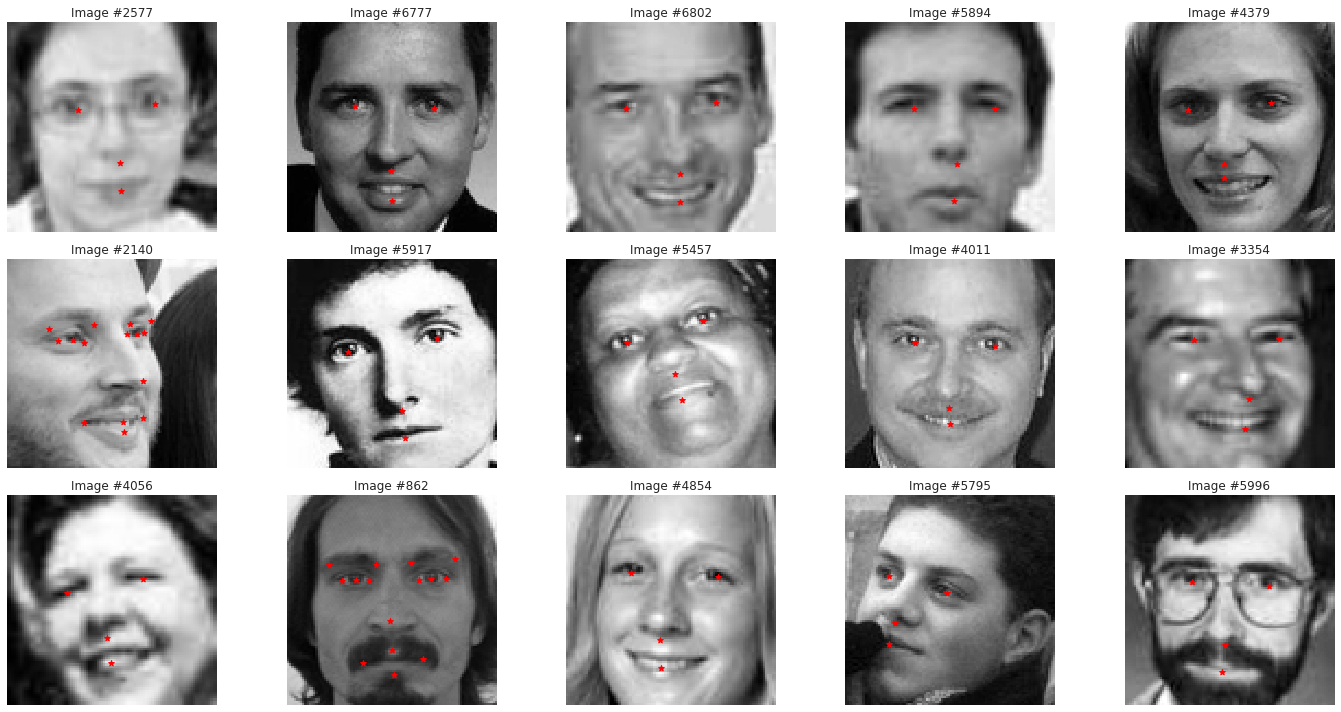

In [7]:
rand_ord = np.random.permutation(train.shape[0])

fig = plt.figure(figsize=(20,10))
plt.gray()

for i in range(0, 15):
    feat = []
    img = np.array(train['Image'][rand_ord[i]].split(' '), dtype=np.float32).reshape((96, 96))
    feat = train.loc[rand_ord[i], feat_cols[:]].values
    ax = plt.subplot(3, 5, i+1)
    ax.scatter(feat[0::2], feat[1::2], c='r', marker='*')
    ax.set_title('Image #' + str(rand_ord[i]))
    ax.imshow(img)
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Lot of missing values, let's clean'em up

In [8]:
# Check for the Null values in all the columns
num_mis_val_count = (train.isna().sum())
num_mis_val_count = num_mis_val_count[num_mis_val_count > 0].sort_values(ascending=False)
print('Total Columns with "nan/null" values:', len(num_mis_val_count))
print(num_mis_val_count)

Total Columns with "nan/null" values: 28
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
right_eyebrow_inner_end_x    4779
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
dtype: 

In [9]:
train_cp = train.copy()
train_cp = train_cp.fillna(np.nan)
train_cp.dropna(inplace=True)
train_cp.reset_index(drop=True, inplace=True)
train_cp.shape

(2140, 31)

In [10]:
num_mis_val_count = (train_cp.isna().sum())
num_mis_val_count = num_mis_val_count[num_mis_val_count > 0].sort_values(ascending=False)
print('Total Columns with "nan/null" values:', len(num_mis_val_count))

Total Columns with "nan/null" values: 0


# Modelling

## PyTorch

In [11]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torchvision import models, transforms
from torchvision.utils import make_grid
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Data Preparation

**Tensor dataset**

In [12]:
""" Train Data Conversion """

# Images
images = []

for i in range(len(train_cp)):
    images.append(train_cp['Image'][i].split(' '))

train_X= np.array(images, dtype='float').reshape(train_cp.shape[0], 1, 96, 96)

# Features
features = train_cp.drop(['Image'], axis=1)
features_list = []

for i in range(len(features)):
    features_list.append(features.iloc[i])
    
train_y = np.array(features_list, dtype='float')

""" Test Data Conversion """

# Images
test_img = []

for i in range(len(test)):
    test_img.append(test['Image'][i].split(' '))

test_X= np.array(test_img, dtype='float').reshape(test.shape[0], 1, 96, 96)


""" Split the training data """

train_x, val_x, train_y, val_y = train_test_split(train_X, train_y, train_size=0.9)

""" numpy to Tensor """

train_x_t = torch.from_numpy(train_x).type(torch.FloatTensor)
val_x_t = torch.from_numpy(val_x).type(torch.FloatTensor)
train_y_t = torch.from_numpy(train_y).type(torch.FloatTensor)
val_y_t = torch.from_numpy(val_y).type(torch.FloatTensor)
test_t = torch.from_numpy(test_X).type(torch.FloatTensor)

print(train_x_t.shape, val_x_t.shape, train_y_t.shape, val_y_t.shape, test_t.shape)

torch.Size([1926, 1, 96, 96]) torch.Size([214, 1, 96, 96]) torch.Size([1926, 30]) torch.Size([214, 30]) torch.Size([1783, 1, 96, 96])


In [13]:
train_dataset = TensorDataset(train_x_t, train_y_t)
val_dataset = TensorDataset(val_x_t, val_y_t)

batch_sz = 8

# train dataloader
train_loader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True, num_workers=4)

# Validation dataloader
val_loader = DataLoader(val_dataset, batch_size=batch_sz, shuffle=True, num_workers=4)

In [14]:
def check_shape(ds_loader):
    examples = enumerate(ds_loader)
    # b_id, (example_data, example_targets) = next(examples)
    b_id, example_data = next(examples)
    return b_id, example_data[0].size()

print('[Train] batch Sample Shape: ', check_shape(train_loader))
print('[Val]   batch Sample Shape: ', check_shape(val_loader))

[Train] batch Sample Shape:  (0, torch.Size([8, 1, 96, 96]))
[Val]   batch Sample Shape:  (0, torch.Size([8, 1, 96, 96]))


**Batch Visulalization**

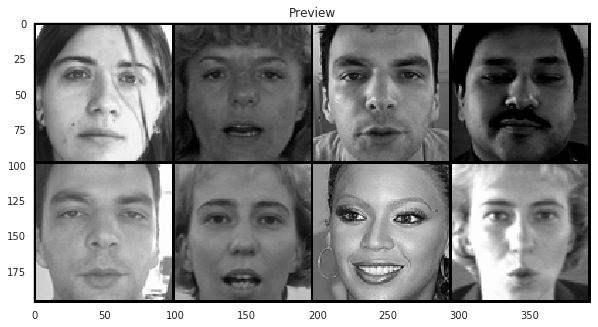

In [15]:
def imshow(img, title=''):
    """Plot the image batch.
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)), cmap='gray')
    plt.grid(False)
    plt.show()

for i, data in enumerate(train_loader):
    x, y = data
    imshow(make_grid(x, 4, normalize=True), title='Preview')
    break

## Model Creation

In [16]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        ''' MODEL - 1 '''
        
#         self.conv1 = nn.Sequential(
#             nn.Conv2d(1, 32, 3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(32),
#             nn.Conv2d(32, 64, 3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, 2),
#             nn.Conv2d(64, 64, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, 2),
#             nn.Conv2d(64, 128, 3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2, 2),
#             nn.Dropout(0.25)
#         )

#         self.fc = nn.Sequential(
#             nn.Linear(128*6*6, 1024),
#             nn.Linear(1024, 256),
#             nn.Linear(256, 30)
#         )


        ''' MODEL - 2 '''
    
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(128*3*3, 512),
            nn.Linear(512, 256),
            nn.Linear(256, 30)
        )
                
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [17]:
model = Model()
model = model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [18]:
summary(model, (1, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 96, 96]             160
              ReLU-2           [-1, 16, 96, 96]               0
       BatchNorm2d-3           [-1, 16, 96, 96]              32
            Conv2d-4           [-1, 16, 96, 96]           2,320
              ReLU-5           [-1, 16, 96, 96]               0
       BatchNorm2d-6           [-1, 16, 96, 96]              32
            Conv2d-7           [-1, 32, 48, 48]           4,640
              ReLU-8           [-1, 32, 48, 48]               0
       BatchNorm2d-9           [-1, 32, 48, 48]              64
        MaxPool2d-10           [-1, 32, 24, 24]               0
          Dropout-11           [-1, 32, 24, 24]               0
           Conv2d-12           [-1, 64, 24, 24]          18,496
             ReLU-13           [-1, 64, 24, 24]               0
      BatchNorm2d-14           [-1, 64,

In [20]:
import time
import copy

epochs = 200
train_losses, val_losses = [], []
start_time = time.time()
counter = 0
best_val_loss = float('Inf')

for e in range(epochs):
    epoch_start_time = time.time()
    running_loss = 0
    
    # training step
    model.train()
    for images, key_pts in train_loader:
        # load data to GPU
        images = images.to(device)
        key_pts = key_pts.to(device)
        
        optimizer.zero_grad()
        output = model(images)
        
        loss = criterion(output, key_pts)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        del images, key_pts, output
    
    # record training loss and error, then evaluate using validation data
    train_losses.append(running_loss/len(train_loader))
    val_loss = 0
    
    model.eval()
    with torch.no_grad():
        for images, key_pts in val_loader:
            images = images.to(device)
            key_pts = key_pts.to(device)
            output = model(images)
            val_loss += criterion(output, key_pts)
            
            del images, key_pts, output

    val_losses.append(val_loss/len(val_loader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Time: {:.2f}s..".format(time.time()-epoch_start_time),
          "Training Loss: {:.3f}.. ".format(train_losses[-1]),
          "Val Loss: {:.3f}.. ".format(val_losses[-1]))
        
best_model_wts = copy.deepcopy(model.state_dict())
model.load_state_dict(best_model_wts)

Epoch: 1/200..  Time: 3.30s.. Training Loss: 370.007..  Val Loss: 31.299.. 
Epoch: 2/200..  Time: 2.08s.. Training Loss: 17.144..  Val Loss: 16.032.. 
Epoch: 3/200..  Time: 2.05s.. Training Loss: 15.649..  Val Loss: 23.108.. 
Epoch: 4/200..  Time: 2.09s.. Training Loss: 14.543..  Val Loss: 17.323.. 
Epoch: 5/200..  Time: 2.01s.. Training Loss: 13.896..  Val Loss: 17.018.. 
Epoch: 6/200..  Time: 2.10s.. Training Loss: 13.555..  Val Loss: 11.025.. 
Epoch: 7/200..  Time: 2.30s.. Training Loss: 11.516..  Val Loss: 11.531.. 
Epoch: 8/200..  Time: 2.30s.. Training Loss: 10.812..  Val Loss: 11.023.. 
Epoch: 9/200..  Time: 2.25s.. Training Loss: 10.157..  Val Loss: 8.325.. 
Epoch: 10/200..  Time: 2.08s.. Training Loss: 9.259..  Val Loss: 9.049.. 
Epoch: 11/200..  Time: 2.11s.. Training Loss: 8.882..  Val Loss: 7.483.. 
Epoch: 12/200..  Time: 2.14s.. Training Loss: 8.583..  Val Loss: 6.382.. 
Epoch: 13/200..  Time: 2.09s.. Training Loss: 8.423..  Val Loss: 6.773.. 
Epoch: 14/200..  Time: 2.14s.

Epoch: 112/200..  Time: 2.03s.. Training Loss: 3.153..  Val Loss: 2.592.. 
Epoch: 113/200..  Time: 2.06s.. Training Loss: 2.956..  Val Loss: 2.475.. 
Epoch: 114/200..  Time: 2.05s.. Training Loss: 3.000..  Val Loss: 2.344.. 
Epoch: 115/200..  Time: 2.13s.. Training Loss: 2.983..  Val Loss: 2.651.. 
Epoch: 116/200..  Time: 2.30s.. Training Loss: 2.849..  Val Loss: 2.411.. 
Epoch: 117/200..  Time: 2.16s.. Training Loss: 2.965..  Val Loss: 2.505.. 
Epoch: 118/200..  Time: 2.31s.. Training Loss: 2.964..  Val Loss: 2.630.. 
Epoch: 119/200..  Time: 2.21s.. Training Loss: 2.930..  Val Loss: 2.839.. 
Epoch: 120/200..  Time: 2.13s.. Training Loss: 3.066..  Val Loss: 3.392.. 
Epoch: 121/200..  Time: 2.15s.. Training Loss: 2.851..  Val Loss: 2.533.. 
Epoch: 122/200..  Time: 2.12s.. Training Loss: 2.987..  Val Loss: 3.181.. 
Epoch: 123/200..  Time: 2.11s.. Training Loss: 3.095..  Val Loss: 2.491.. 
Epoch: 124/200..  Time: 2.10s.. Training Loss: 3.076..  Val Loss: 2.280.. 
Epoch: 125/200..  Time: 2

<All keys matched successfully>

## Free up some cache

In [22]:
torch.cuda.empty_cache()

In [23]:
torch.save(model.state_dict(), 'Facial_key_points_v2.pt')

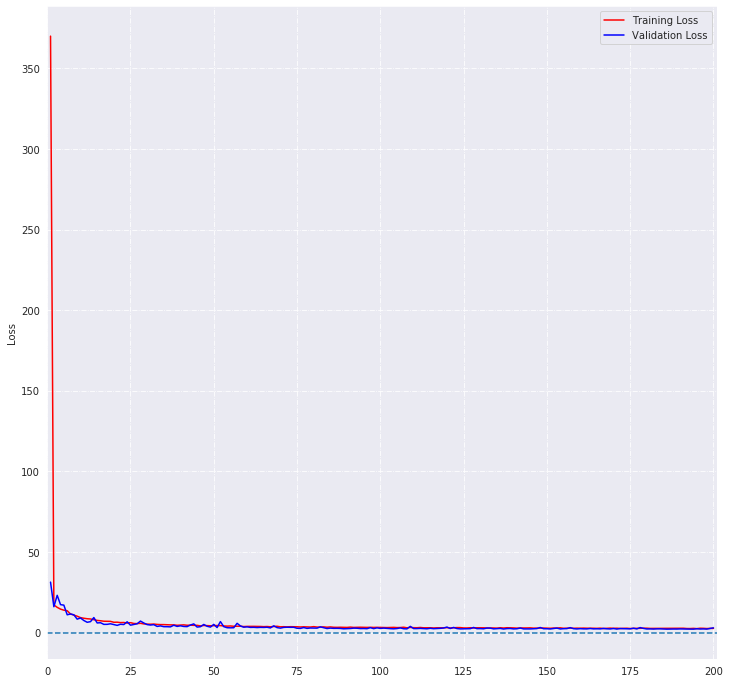

In [25]:
stopped_at_epoch = e
plt.figure(figsize=(12,12))

ax = plt.gca()
ax.set_xlim([0, stopped_at_epoch + 2])
plt.ylabel('Loss')
plt.plot(range(1, stopped_at_epoch + 2), train_losses[:stopped_at_epoch+1], 'r', label='Training Loss')
plt.plot(range(1, stopped_at_epoch + 2), val_losses[:stopped_at_epoch+1], 'b', label='Validation Loss')
ax.grid(linestyle='-.')
plt.axhline(y=0, linestyle='--')
plt.legend()
plt.show()

## Prediction

In [26]:
model.eval()
with torch.no_grad():
    prediction = model(test_t.to(device))
prediction = prediction.cpu().tolist()
len(prediction)

1783

## Visulaize Prediction on Test data

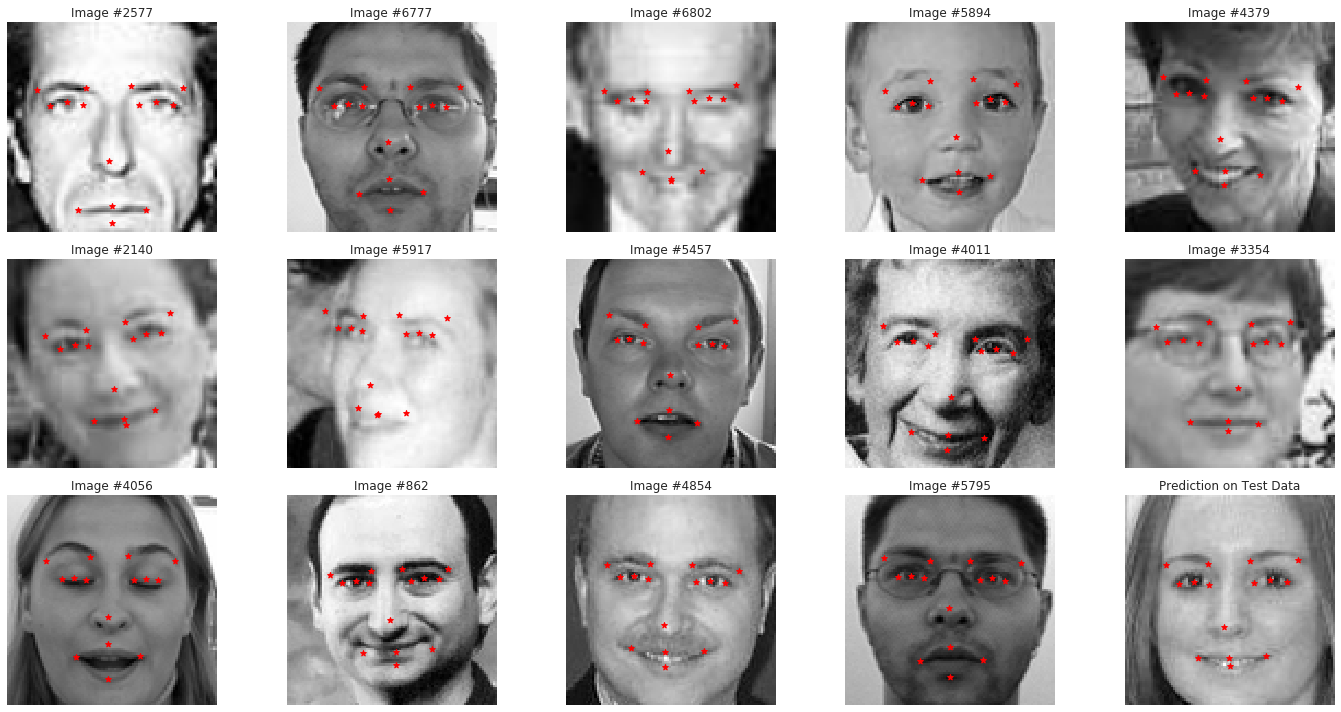

In [27]:
rand_test_ord = np.random.permutation(test.shape[0])

fig = plt.figure(figsize=(20,10))
plt.gray()

for i in range(0, 15):
    feat = []
    img = np.array(test['Image'][rand_test_ord[i]].split(' '), dtype=np.float32).reshape((96, 96))
    feat = prediction[rand_test_ord[i]]
    ax = plt.subplot(3, 5, i+1)
    ax.scatter(feat[0::2], feat[1::2], c='r', marker='*')
    ax.set_title('Image #' + str(rand_ord[i]))
    ax.imshow(img)
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.title('Prediction on Test Data')
plt.show()

# CSV generation

In [28]:
id_df = pd.read_csv('IdLookupTable.csv')

In [29]:
id_lookup_features = list(id_df['FeatureName'])
id_lookup_image = list(id_df['ImageId'])

for i in range(len(id_lookup_features)):
    id_lookup_features[i] = feat_cols.index(id_lookup_features[i])

location = []
for i in range(len(id_lookup_features)):
    location.append(prediction[id_lookup_image[i]-1][id_lookup_features[i]])

In [30]:
id_df['Location'] = location

In [31]:
submission = id_df[['RowId', 'Location']]
submission.tail(5)

,RowId,Location
27119,27120,36.275009
27120,27121,46.630959
27121,27122,56.746696
27122,27123,44.975056
27123,27124,84.239380


In [33]:
submission.to_csv('Face_points_v2.csv', index=False)